# **Previsão de Notas de alunos por meio de Árvore de Decisão**

### Definindo a base de dados e bibliotecas utilizadas
------------------------------------------------
* Importando as bibliotecas:

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import numpy as np
from matplotlib import pyplot as plt
import pydot
import graphviz
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

-------------------------------------------------------
* Carregamento das Bases de Dados 

In [7]:
df_mat = pd.read_csv("../data/student-mat.csv")
df_por = pd.read_csv("../data/student-por.csv")

In [8]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


--------------------------------
###  Analisando os dados:
* Matérias: Português e Matemática
* Atributos:

  * Sex: Female or Male;
  * Age: from 15 to 22;
  * Medu: Mother's education (from 0 to 4°);
  * Fedu: Father's education (from 0 to 4°);
  * Studytime: from 1 to 4;
  * Failures: n if 1<= n <= 3. else 4;
  * Schoolsup: School Support (binary yes or no);
  * Famsup: Family Support (binary yes or no);
  * Internet: binary yes or no;
  * Freetime: from 1 (very low) to 5 (very high);
  * Goout: from 1 (very low) to 5 (very high);
  * Walc: weekend alchool consumption (from 1 (very low) to 5 (very high));
  * Health: from 1 (very bad) to 5 (very good);

------------------------------------------------
* Criando coluna pelo sistema binário de classificação:


    |    pass    |    fail    |
    |  20 - 10   |   09 - 0   |


In [10]:
result_mat = []
result_por = []

for row in df_mat['G3']:
        if row >= 10:
          result_mat.append('pass')
        else:
          result_mat.append('fail')
df_mat['binaryClass'] = result_mat

for row in df_por['G3']:
        if row >= 10:
          result_por.append('pass')
        else:
          result_por.append('fail')
df_por['binaryClass'] = result_por

In [11]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,binaryClass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,pass


In [12]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,binaryClass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,pass
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,pass
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,pass


-----------------------------
### Construindo o algoritmo da árvore de decisão:
* É necessário deixar todos os atributos que usaremos em valores numericos

In [13]:
# for math
# for yes / no values:
d = {'yes': 1, 'no': 0}
df_mat['schoolsup'] = df_mat['schoolsup'].map(d)
df_mat['famsup'] = df_mat['famsup'].map(d)
df_mat['internet'] = df_mat['internet'].map(d)

# map the sex data
d = {'F': 1, 'M': 0}
df_mat['sex'] = df_mat['sex'].map(d)

# map the grades data
d = {'pass': 1, 'fail': 0}
df_mat['binaryClass'] = df_mat['binaryClass'].map(d)

In [14]:
# for portuguese
# for yes / no values:
d = {'yes': 1, 'no': 0}
df_por['schoolsup'] = df_por['schoolsup'].map(d)
df_por['famsup'] = df_por['famsup'].map(d)
df_por['internet'] = df_por['internet'].map(d)

# map the sex data
d = {'F': 1, 'M': 0}
df_por['sex'] = df_por['sex'].map(d)

# map the grades data
d = {'pass': 1, 'fail': 0}
df_por['binaryClass'] = df_por['binaryClass'].map(d)

* Formando os atributos preditivos que queremos

In [15]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,binaryClass
0,GP,1,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0
1,GP,1,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
2,GP,1,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,1,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,1,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1


In [16]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,binaryClass
0,GP,1,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,1
1,GP,1,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,1
2,GP,1,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,1,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,1,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1


In [17]:
df_mat_ABIN = pd.DataFrame(df_mat, columns=['sex', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
                                        'schoolsup', 'famsup', 'internet', 'freetime', 'goout',
                                        'Walc', 'health', 'G1', 'G2', 'binaryClass'])
df_mat_ABIN.head()

,sex,age,Medu,Fedu,studytime,failures,schoolsup,famsup,internet,freetime,goout,Walc,health,G1,G2,binaryClass
0,1,18,4,4,2,0,1,0,0,3,4,1,3,5,6,0
1,1,17,1,1,2,0,0,1,1,3,3,1,3,5,5,0
2,1,15,1,1,2,3,1,0,1,3,2,3,3,7,8,1
3,1,15,4,2,3,0,0,1,1,2,2,1,5,15,14,1
4,1,16,3,3,2,0,0,1,0,3,2,2,5,6,10,1


In [18]:
df_por_ABIN = pd.DataFrame(df_por, columns=['sex', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
                                        'schoolsup', 'famsup', 'internet', 'freetime', 'goout',
                                        'Walc', 'health', 'G1', 'G2', 'binaryClass'])
df_por_ABIN.head()

,sex,age,Medu,Fedu,studytime,failures,schoolsup,famsup,internet,freetime,goout,Walc,health,G1,G2,binaryClass
0,1,18,4,4,2,0,1,0,0,3,4,1,3,0,11,1
1,1,17,1,1,2,0,0,1,1,3,3,1,3,9,11,1
2,1,15,1,1,2,0,1,0,1,3,2,3,3,12,13,1
3,1,15,4,2,3,0,0,1,1,2,2,1,5,14,14,1
4,1,16,3,3,2,0,0,1,0,3,2,2,5,11,13,1


In [19]:
df_student_mat = df_mat_ABIN.columns.tolist()
df_student_mat.remove('binaryClass')

In [20]:
df_student_por = df_por_ABIN.columns.tolist()
df_student_por.remove('binaryClass')

------------------------------------------
### Gerando a árvore

* Para matemática

In [21]:
Xmat = df_mat_ABIN.drop(columns=['binaryClass'])
ymat = df_mat_ABIN['binaryClass']

In [22]:
Xmat_train, Xmat_test, ymat_train, ymat_test = train_test_split(Xmat, ymat, test_size=0.3, random_state=100)

-------------------------------------------
* O mesmo para português

In [23]:
Xpor = df_por_ABIN.drop(columns=['binaryClass'])
ypor = df_por_ABIN['binaryClass']

In [24]:
Xpor_train, Xpor_test, ypor_train, ypor_test = train_test_split(Xpor, ypor, test_size=0.3, random_state=100)

-------------------------------------------------

In [25]:
ymat_train.shape, ymat_test.shape

((276,), (119,))

In [26]:
ymat_train

59     1
337    0
23     1
88     1
335    1
      ..
343    0
359    1
323    1
280    0
8      1
Name: binaryClass, Length: 276, dtype: int64

In [27]:
ypor_train.shape, ypor_test.shape

((454,), (195,))

-----------------------------------------------
* Criando o classificador

In [28]:
tree_mat_ABIN = tree.DecisionTreeClassifier(max_leaf_nodes=len(Xmat.columns), random_state=0)
tree_mat_ABIN.fit(Xmat_train, ymat_train)

DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)

In [29]:
tree_por_ABIN = tree.DecisionTreeClassifier(max_leaf_nodes=len(Xpor.columns), random_state=0)
tree_por_ABIN.fit(Xpor_train, ypor_train)

DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)

In [30]:
predictions = tree_mat_ABIN.predict(Xmat_test)

In [31]:
accuracy_score(y_true = ymat_test, y_pred = predictions)

0.8907563025210085

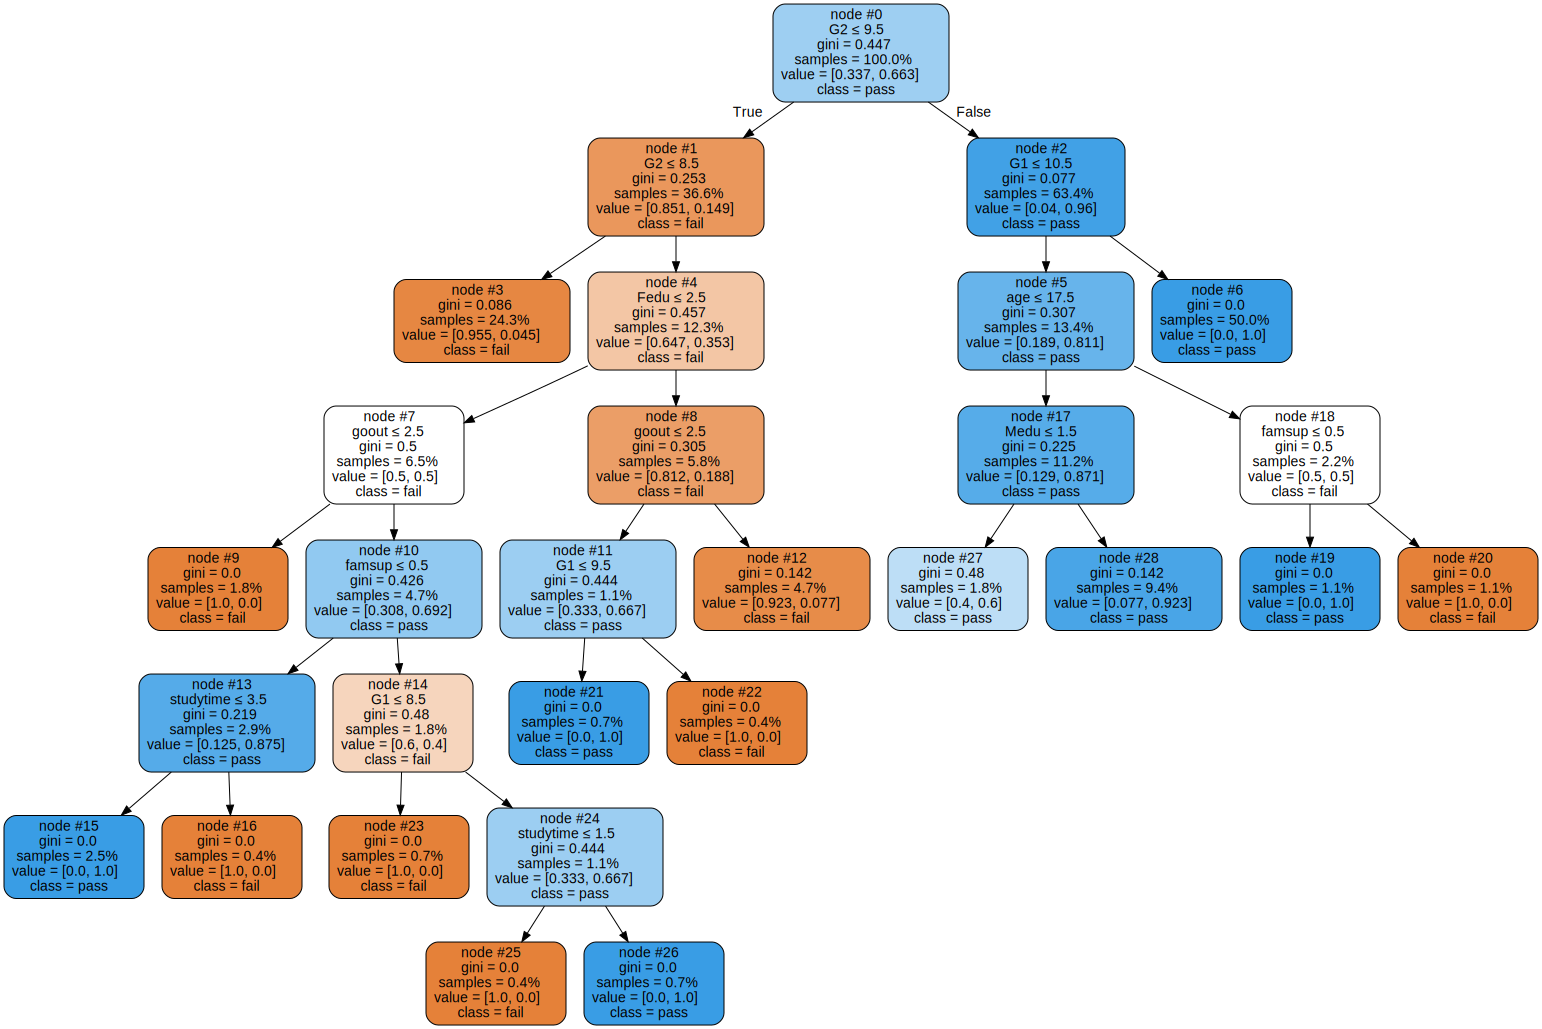

In [32]:
dot_data = export_graphviz(tree_mat_ABIN, 
                          out_file = None,
                          feature_names = df_student_mat,
                          class_names = ['fail', 'pass'],
                          filled = True, rounded = True,
                          proportion = True,
                          node_ids = True,
                          rotate = False,
                          label = 'all',
                          special_characters = True)
graph = graphviz.Source(dot_data)
graph

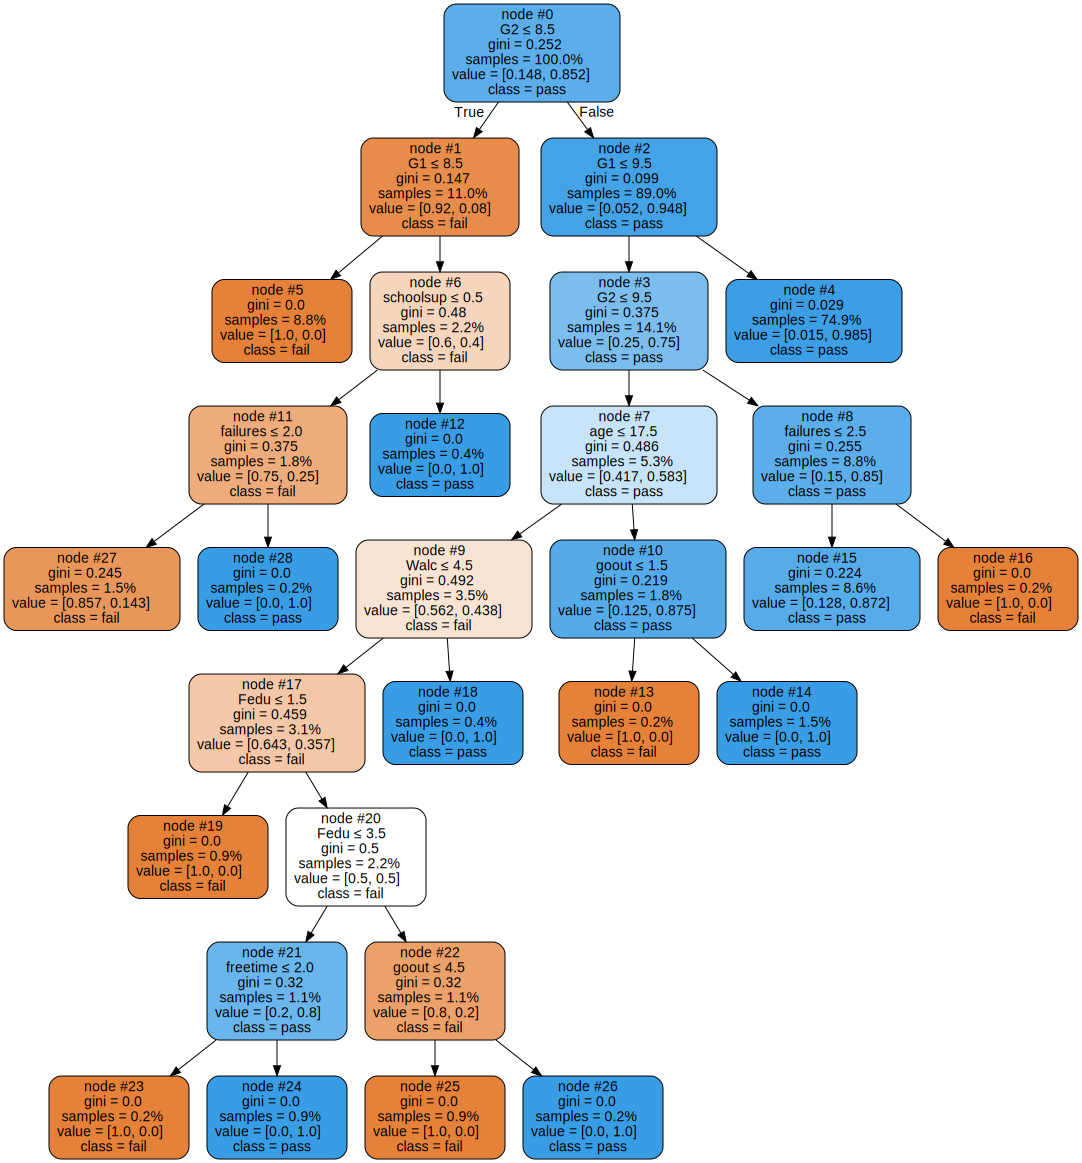

In [33]:
dot_data = export_graphviz(tree_por_ABIN, 
                          out_file = None,
                          feature_names = df_student_por,
                          class_names = ['fail', 'pass'],
                          filled = True, rounded = True,
                          proportion = True,
                          node_ids = True,
                          rotate = False,
                          label = 'all',
                          special_characters = True)
graph = graphviz.Source(dot_data)
graph

In [34]:
predictions = tree_por_ABIN.predict(Xpor_test)

In [35]:
accuracy_score(y_true = ypor_test, y_pred = predictions)

0.9179487179487179

--------------------------------------------------------
### **Gerando regras a partir da árvore de decisão**

In [36]:
iris = load_iris()
tree_mat = tree_mat_ABIN.fit(iris.data, iris.target)
tree_mat.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
tree_por = tree_mat_ABIN.fit(iris.data, iris.target)
tree_por.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
tree_mat.tree_.__getstate__()['nodes']

array([( 1,  2,  3,  0.80000001, 0.66666667, 150, 150.),
       (-1, -1, -2, -2.        , 0.        ,  50,  50.),
       ( 3,  4,  3,  1.75      , 0.5       , 100, 100.),
       ( 5,  6,  2,  4.95000005, 0.16803841,  54,  54.),
       (13, 14,  2,  4.85000014, 0.04253308,  46,  46.),
       ( 7,  8,  3,  1.65000004, 0.04079861,  48,  48.),
       ( 9, 10,  3,  1.55000001, 0.44444444,   6,   6.),
       (-1, -1, -2, -2.        , 0.        ,  47,  47.),
       (-1, -1, -2, -2.        , 0.        ,   1,   1.),
       (-1, -1, -2, -2.        , 0.        ,   3,   3.),
       (11, 12,  2,  5.45000005, 0.44444444,   3,   3.),
       (-1, -1, -2, -2.        , 0.        ,   2,   2.),
       (-1, -1, -2, -2.        , 0.        ,   1,   1.),
       (15, 16,  1,  3.10000002, 0.44444444,   3,   3.),
       (-1, -1, -2, -2.        , 0.        ,  43,  43.),
       (-1, -1, -2, -2.        , 0.        ,   2,   2.),
       (-1, -1, -2, -2.        , 0.        ,   1,   1.)],
      dtype=[('left_child', '<

In [39]:
tree_por.tree_.__getstate__()['nodes']

array([( 1,  2,  3,  0.80000001, 0.66666667, 150, 150.),
       (-1, -1, -2, -2.        , 0.        ,  50,  50.),
       ( 3,  4,  3,  1.75      , 0.5       , 100, 100.),
       ( 5,  6,  2,  4.95000005, 0.16803841,  54,  54.),
       (13, 14,  2,  4.85000014, 0.04253308,  46,  46.),
       ( 7,  8,  3,  1.65000004, 0.04079861,  48,  48.),
       ( 9, 10,  3,  1.55000001, 0.44444444,   6,   6.),
       (-1, -1, -2, -2.        , 0.        ,  47,  47.),
       (-1, -1, -2, -2.        , 0.        ,   1,   1.),
       (-1, -1, -2, -2.        , 0.        ,   3,   3.),
       (11, 12,  2,  5.45000005, 0.44444444,   3,   3.),
       (-1, -1, -2, -2.        , 0.        ,   2,   2.),
       (-1, -1, -2, -2.        , 0.        ,   1,   1.),
       (15, 16,  1,  3.10000002, 0.44444444,   3,   3.),
       (-1, -1, -2, -2.        , 0.        ,  43,  43.),
       (-1, -1, -2, -2.        , 0.        ,   2,   2.),
       (-1, -1, -2, -2.        , 0.        ,   1,   1.)],
      dtype=[('left_child', '<

In [49]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [53]:
from sklearn.tree import _tree

In [56]:
rules = get_rules(tree_por_ABIN, df_student_por, ['fail', 'pass'])

In [57]:
for r in rules:
    print(r)

if (G2 > 8.5) and (G1 > 9.5) then class: pass (proba: 98.53%) | based on 340 samples
if (G2 <= 8.5) and (G1 <= 8.5) then class: fail (proba: 100.0%) | based on 40 samples
if (G2 > 8.5) and (G1 <= 9.5) and (G2 > 9.5) and (failures <= 2.5) then class: pass (proba: 87.18%) | based on 39 samples
if (G2 > 8.5) and (G1 <= 9.5) and (G2 <= 9.5) and (age > 17.5) and (goout > 1.5) then class: pass (proba: 100.0%) | based on 7 samples
if (G2 <= 8.5) and (G1 > 8.5) and (schoolsup <= 0.5) and (failures <= 2.0) then class: fail (proba: 85.71%) | based on 7 samples
if (G2 > 8.5) and (G1 <= 9.5) and (G2 <= 9.5) and (age <= 17.5) and (Walc <= 4.5) and (Fedu > 1.5) and (Fedu > 3.5) and (goout <= 4.5) then class: fail (proba: 100.0%) | based on 4 samples
if (G2 > 8.5) and (G1 <= 9.5) and (G2 <= 9.5) and (age <= 17.5) and (Walc <= 4.5) and (Fedu > 1.5) and (Fedu <= 3.5) and (freetime > 2.0) then class: pass (proba: 100.0%) | based on 4 samples
if (G2 > 8.5) and (G1 <= 9.5) and (G2 <= 9.5) and (age <= 17.5